## Задача 1

Проведите экспетимент:
1. Создайте условную картинку - белый квадрат размером 30 на 30 пикселей на черном фоне картинки размерами 100 на 100 пикселей.
2. Создайте негатив этой картинки - черный квадрат на белом фоне.
3. К обоим картинкам примените операцию расширения.
4. К обоим картинкам примените операцию эрозии.
5. Сделайте выводы.

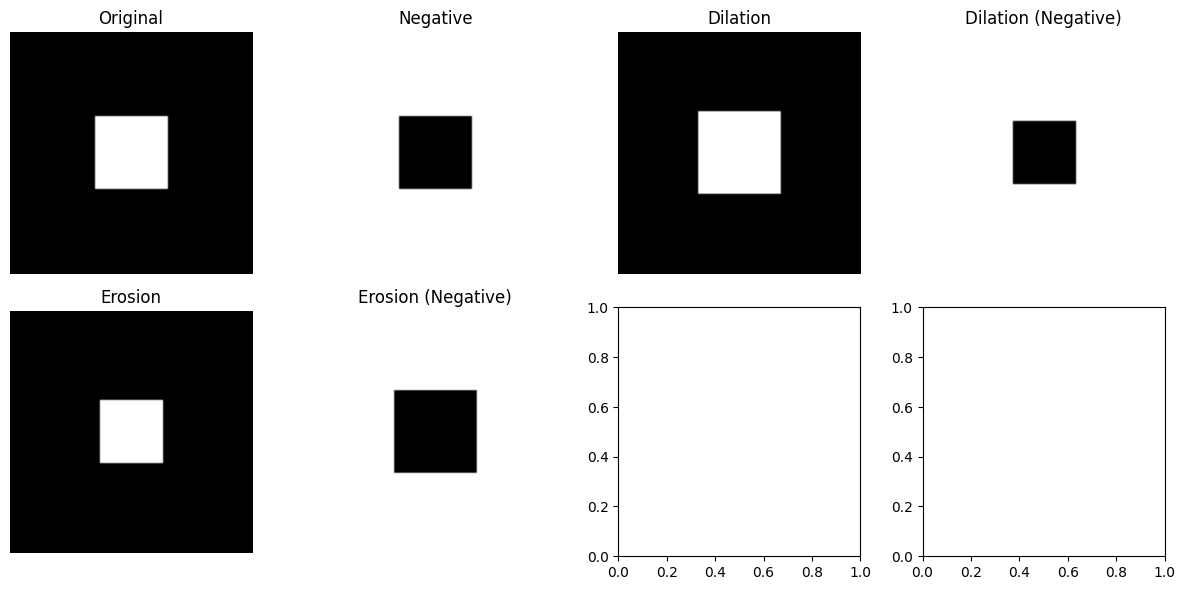

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Создание исходного изображения (белый квадрат на черном фоне)
img_size = 100
square_size = 30
img = np.zeros((img_size, img_size), dtype=np.uint8)
start = (img_size - square_size) // 2  # Центрирование квадрата
img[start:start+square_size, start:start+square_size] = 255

# Создание негатива (черный квадрат на белом фоне)
negative_img = cv2.bitwise_not(img)

# Структурный элемент для морфологических операций
kernel = np.ones((5, 5), np.uint8)  # Квадрат 5x5

# Применение операции расширения (dilation)
dilated_img = cv2.dilate(img, kernel, iterations=1)
dilated_negative_img = cv2.dilate(negative_img, kernel, iterations=1)

# Применение операции эрозии (erosion)
eroded_img = cv2.erode(img, kernel, iterations=1)
eroded_negative_img = cv2.erode(negative_img, kernel, iterations=1)

# Визуализация результатов
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
titles = ["Original", "Negative", "Dilation", "Dilation (Negative)",
          "Erosion", "Erosion (Negative)"]

images = [img, negative_img, dilated_img, dilated_negative_img,
          eroded_img, eroded_negative_img]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


## Задача 2

Заполнить отверстия внутри объектов на бинарном изображении. Подберите подходящую картинку самостоятельно.

Можно использовать картинки [1](https://drive.google.com/file/d/1Yp_7FdzL3Ou6N10cEiS3MZJUcNmBg4FE/view?usp=drive_link) [2](https://drive.google.com/file/d/1fniVuHygcJNaRe2WgBRgtQ4VtZjZyYnI/view?usp=drive_link) [3](https://drive.google.com/file/d/11yjAyf6Ddbb4wDv7_WyiYRCWchmOyqC6/view?usp=drive_link) [4](https://drive.google.com/file/d/1B60nmOzS17uvOJD6uvS0aHJv0AWeSez9/view?usp=drive_link) Или подобрать подходящую картинку самостоятельно.

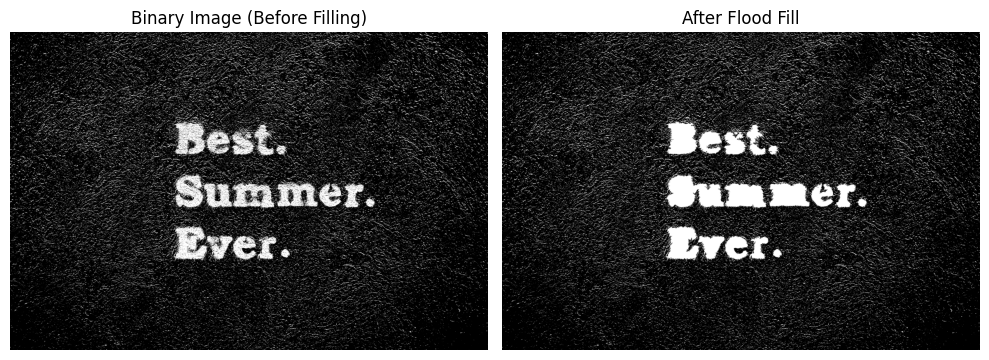

In [ ]:


# Загрузка нового изображения
image_path = "/content/text1.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Бинаризация изображения
_, binary_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Копируем бинарное изображение для применения заливки
filled_img = binary_img.copy()

# Создаем маску для floodFill (размер должен быть на 2 больше, чем изображение)
h, w = binary_img.shape
mask = np.zeros((h+2, w+2), np.uint8)

# Заливаем фон от точки (0,0)
cv2.floodFill(filled_img, mask, (0, 0), 255)

# Инвертируем залитое изображение и объединяем с оригиналом
filled_img = cv2.bitwise_or(binary_img, cv2.bitwise_not(filled_img))

# Визуализация результата
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(binary_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Binary Image (Before Filling)")
axes[0].axis("off")

axes[1].imshow(filled_img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("After Flood Fill")
axes[1].axis("off")

plt.tight_layout()
plt.show()


## Задача 3

Разделить сросшиеся объекты на бинарном изображении с использованием морфологических операций. Подберите подходящую картинку самостоятельно.

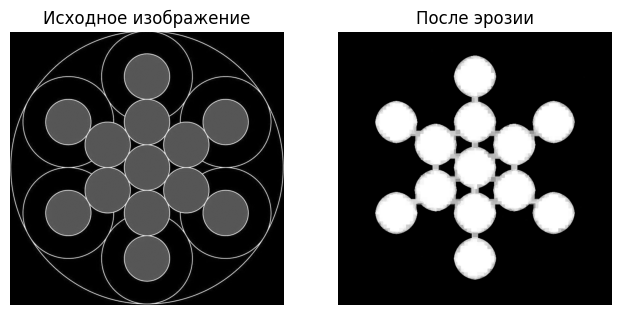

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/1234.png', cv2.IMREAD_GRAYSCALE)

image = cv2.bitwise_not(image)

# Шаг 3: Применение эрозии
# Определение структурного элемента
kernel = np.ones((3, 3), np.uint8)
# Применение эрозии
eroded = cv2.erode(image, kernel, iterations=5)


plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Исходное изображение')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('После эрозии')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.show()

## Задача 4

Подберите подходящее для сегментации изображение в полутонах. Сегментируйте изображение, подобрав порог исходя из гистограммы.

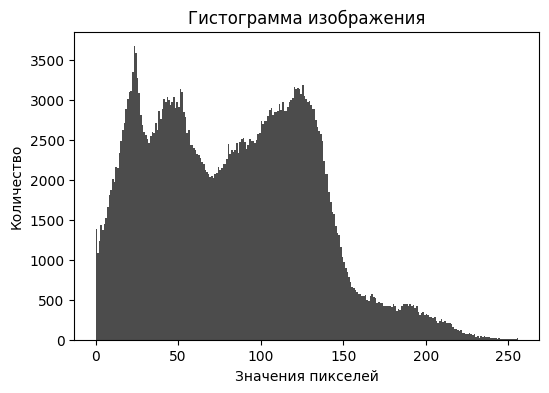

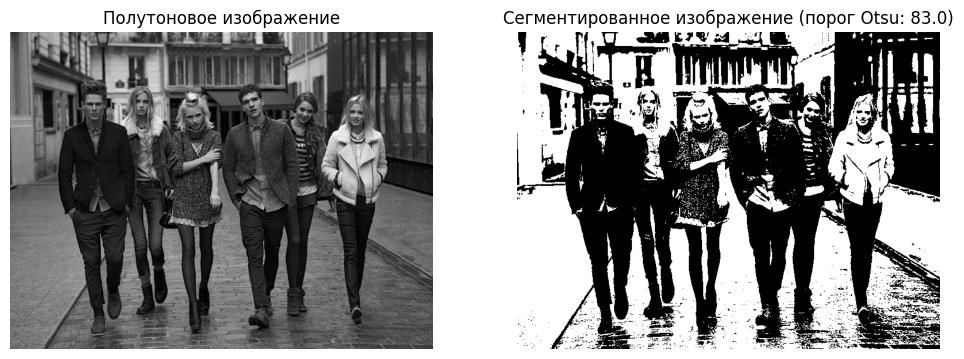

In [ ]:
image_path = "/content/ac126494ce00ec71ffd8b07ef2e516aa.jpg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 4))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title("Гистограмма изображения")
plt.xlabel("Значения пикселей")
plt.ylabel("Количество")
plt.show()

# Автоматический подбор порога с методом Otsu
_, segmented_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Полутоновое изображение")
axes[0].axis("off")

axes[1].imshow(segmented_img, cmap='gray')
axes[1].set_title(f"Сегментированное изображение (порог Otsu: {round(_, 2)})")
axes[1].axis("off")

plt.show()


## Задача 5

Сегментировать изображение на основе анализа гистограммы цветовых каналов (RGB).

Для этого:
1. Разделить изображение на цветовые каналы.
2. Построить гистограммы для каждого канала.
3. Найти пороги для каждого канала (например взять порог по Оцу).
4. Выбрать более-менее подходящее значение порога для изображения исходя из порогов по каналам.
5. Визуализировать результат бинаризации на исходном цветном изображении.



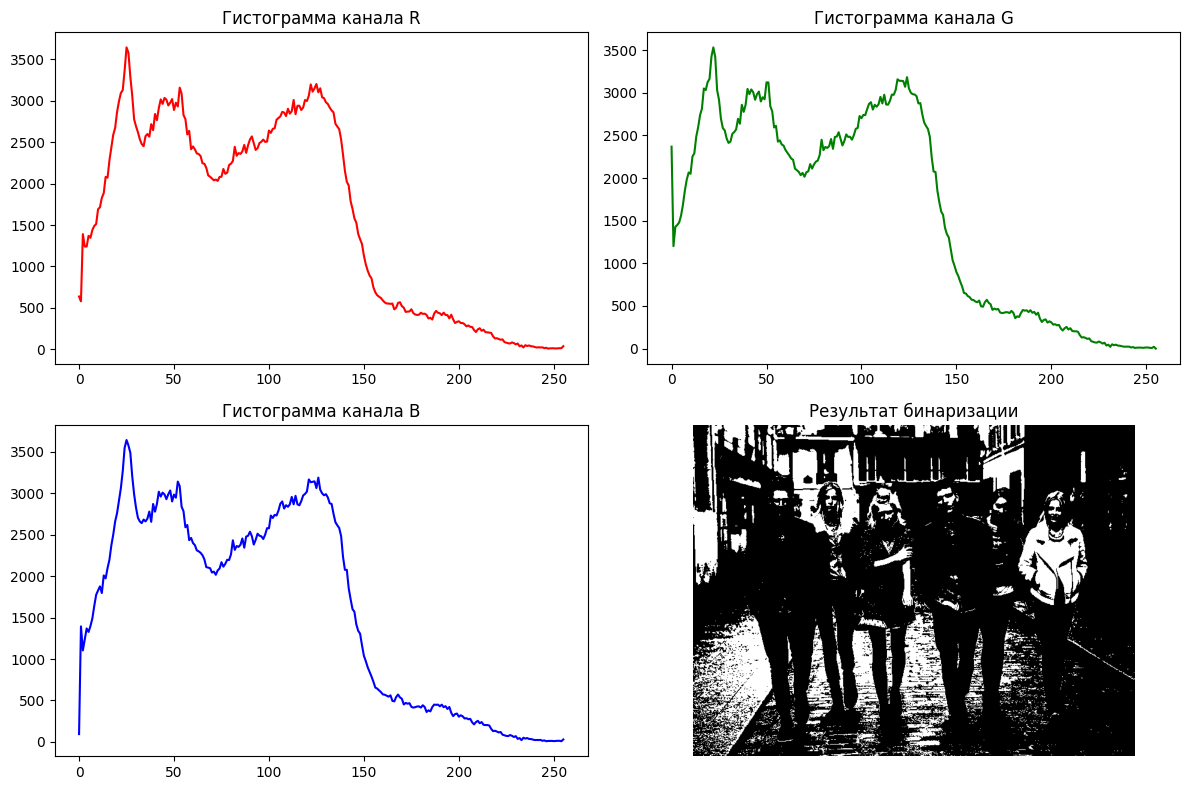

In [ ]:
image = cv2.imread('/content/ac126494ce00ec71ffd8b07ef2e516aa.jpg')

# Разделяем на каналы
r_channel, g_channel, b_channel = cv2.split(image)

# Вычисляем гистограммы
hist_r = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

# Определяем пороги методом Оцу
_, thresh_r = cv2.threshold(r_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_g = cv2.threshold(g_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_b = cv2.threshold(b_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# средний порог
otsu_threshold = (thresh_r.mean() + thresh_g.mean() + thresh_b.mean()) / 3
_, binary_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), int(otsu_threshold), 255, cv2.THRESH_BINARY)

# Визуализируем гистограммы и результат
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Гистограммы каналов
axes[0, 0].plot(hist_r, color='red')
axes[0, 0].set_title("Гистограмма канала R")
axes[0, 1].plot(hist_g, color='green')
axes[0, 1].set_title("Гистограмма канала G")
axes[1, 0].plot(hist_b, color='blue')
axes[1, 0].set_title("Гистограмма канала B")

# Бинаризованное изображение
axes[1, 1].imshow(binary_image, cmap="gray")
axes[1, 1].set_title("Результат бинаризации")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

##Задача 6

С помощью частотных методов выделить на изображении более плавные переходы, размытости и фон, приглушить резкие переходы и границы. Описать что это за фильтр.

Подобрать подходящую картинку самостоятельно.

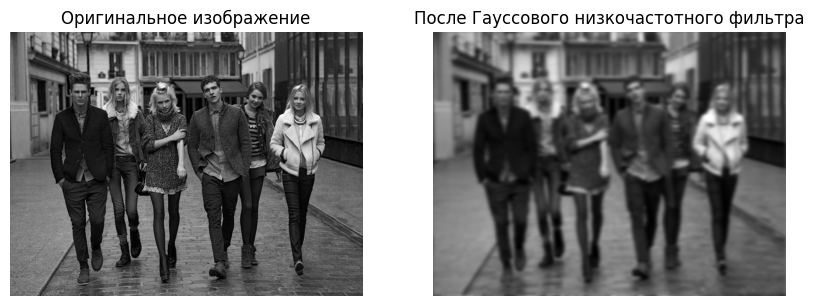

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# Загружаем изображение
image_path = "/content/ac126494ce00ec71ffd8b07ef2e516aa.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Выполняем преобразование Фурье
f_transform = fft2(image)
f_shift = fftshift(f_transform)  # Центрируем низкие частоты

# Создаем Гауссовский низкочастотный фильтр
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
sigma = 30  # Чем выше sigma, тем сильнее размытие

x, y = np.ogrid[:rows, :cols]
gaussian_filter = np.exp(-((x - crow)**2 + (y - ccol)**2) / (2 * sigma**2))

# Применяем фильтр в частотной области
filtered_shift = f_shift * gaussian_filter

# Обратное преобразование Фурье
f_ishift = ifftshift(filtered_shift)
image_filtered = np.abs(ifft2(f_ishift))

# Отображаем результат
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Оригинальное изображение")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title("После Гауссового низкочастотного фильтра")
plt.axis("off")

plt.show()


##Задача 7

С помощью частотных методов приглушить на изображении более плавные переходы, размытости и фон, выделить резкие переходы и границы. Описать что это за фильтр.

Подобрать подходящую картинку самостоятельно.